In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

mfcc = pd.read_csv('mfcc_not_scaled.csv', index_col = 0, header = [0,1,2])

#mfcc = mfcc.drop(mfcc.columns[[12,13,14,15,16,17,18,19,32,33,34,35,36,37,38,39,52,53,54,55,56,57,58,59,72,73,74,75,76,77,78,79,92,93,94,95,96,97,98,99,112,113,114,115,116,117,118,119,132,133,134,135,136,137,138,139]], axis=1)


chroma = pd.read_csv('chroma_not_scaled.csv', index_col = 0, header = [0,1,2])
zcr = pd.read_csv('zcr_not_scaled.csv', index_col = 0, header = [0,1])
centroid_rolloff = pd.read_csv('centroid_rolloff_bandwidth_not_scaled.csv', index_col = 0, header = [0,1])
contrast = pd.read_csv('contrast_not_scaled.csv', index_col = 0, header = [0,1,2])

#pitch_changes = pd.read_csv('pitch_changes.csv', index_col = 0, header = [0])

unscaled_df = mfcc.join([chroma, zcr, centroid_rolloff, contrast])
unscaled_df = unscaled_df.dropna()

ipd.display(unscaled_df)


unscaled_df.to_csv('complete_unscaled_dataset.csv')

,"(mfcc, mean, 1)","(mfcc, mean, 2)","(mfcc, mean, 3)","(mfcc, mean, 4)","(mfcc, mean, 5)","(mfcc, mean, 6)","(mfcc, mean, 7)","(mfcc, mean, 8)","(mfcc, mean, 9)","(mfcc, mean, 10)",...,"(contrast, skew, 3)","(contrast, skew, 4)","(contrast, skew, 5)","(contrast, skew, 6)","(contrast, kurtosis, 1)","(contrast, kurtosis, 2)","(contrast, kurtosis, 3)","(contrast, kurtosis, 4)","(contrast, kurtosis, 5)","(contrast, kurtosis, 6)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,-67.384201,65.155075,-10.669196,12.176932,-3.303557,9.916471,-1.985740,5.415339,-6.161758,1.091336,...,0.249772,0.258381,0.378909,0.744925,3.803164,-0.018434,0.073019,0.147885,0.219722,0.612398
3,-97.992485,72.889534,-3.973132,30.070477,5.172878,12.528610,-4.383329,7.048224,-8.217740,7.234849,...,0.341326,0.129170,-0.095684,0.311029,1.241463,1.104689,0.136208,-0.548991,-0.074470,0.075461
5,-106.587730,87.239357,12.156827,24.140398,-0.970479,12.831119,-5.540452,17.374945,-6.245709,-0.075109,...,0.050779,0.047427,0.273518,0.897610,1.242473,1.775691,0.069869,0.671903,0.269572,2.383789
10,-17.238174,94.442024,-48.614548,32.370766,-4.550584,2.220590,-2.271865,2.682117,-5.288854,0.512593,...,0.329046,0.269207,0.332886,0.402207,3.636584,0.742408,0.366582,0.777638,1.636699,0.900061
134,-84.152870,84.352127,-2.286359,34.442200,4.921756,8.355569,4.027512,19.810892,0.851138,10.797225,...,0.397883,0.624900,0.448236,0.622428,6.003963,0.684611,0.284433,0.538790,0.211476,0.279040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155304,-79.091148,86.971321,13.332952,42.796810,4.142479,13.474188,9.935136,5.118958,-5.375656,4.953872,...,0.240071,-0.221312,-0.074339,0.419140,4.392640,0.723130,0.299717,0.083636,-0.160900,-0.292233
155305,-192.851105,133.374039,30.840197,33.762676,13.907678,-3.243983,0.447482,-3.514450,-15.443760,6.417903,...,0.411566,0.095613,0.305361,0.699289,2.769350,0.068707,1.141640,-0.064294,-0.147984,0.391955
155306,-217.283554,162.253387,-1.447354,32.816235,12.884858,3.195513,4.707439,-3.388822,-0.604373,1.220779,...,0.411181,0.272987,0.483412,0.183274,5.026873,0.892219,0.539851,0.134641,0.157030,0.926083


In [2]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])

#Creating the dependent variable class
factor = pd.factorize(tracks_genres['genre'])
tracks_genres.genre = factor[0]
definitions = factor[1]

#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

#Divido training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Fit e scaling sul training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Oversampling dei dati di training
#SMOTE resampling
#from imblearn.over_sampling import SMOTE, ADASYN
#X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

#Oversampling dei dati di training
#SVM SMOTE resampling
from imblearn.over_sampling import SVMSMOTE
X_train_resampled, y_train_resampled = SVMSMOTE().fit_resample(X_train_scaled, y_train)

#SMOTE ENN (smote + pulizia)
#from imblearn.combine import SMOTEENN
#smote_enn = SMOTEENN(random_state=42)
#X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [3]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Fitting Random Forest Classification to the Training set
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
clf.fit(X_train_resampled, y_train_resampled)

#joblib.dump(scaler, "Scaler.joblib")
joblib.dump(clf, "RFClassifier.joblib")
joblib.dump(definitions, "RFDefinitions.joblib")

['RFDefinitions.joblib']

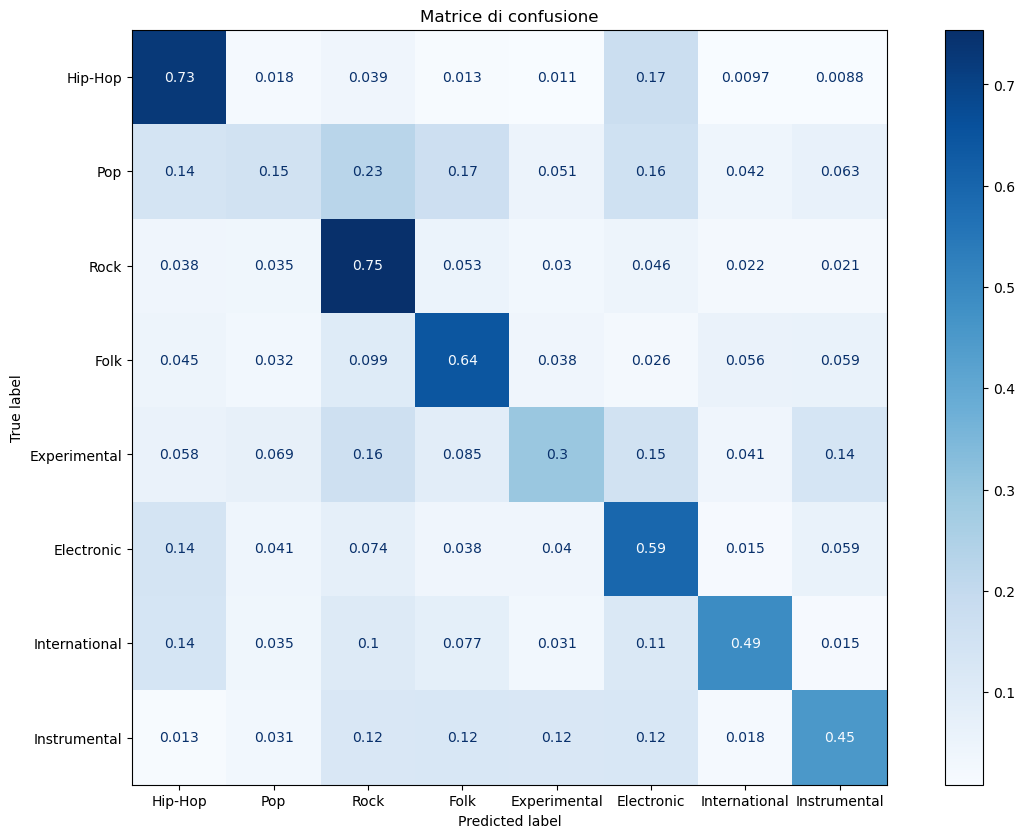

               precision    recall  f1-score   support

   Electronic       0.64      0.59      0.62      2104
 Experimental       0.39      0.30      0.34       739
         Folk       0.52      0.64      0.58       915
      Hip-Hop       0.56      0.73      0.63      1136
 Instrumental       0.45      0.45      0.45       718
International       0.51      0.49      0.50       457
          Pop       0.27      0.15      0.20       765
         Rock       0.71      0.75      0.73      2337

     accuracy                           0.58      9171
    macro avg       0.51      0.51      0.51      9171
 weighted avg       0.56      0.58      0.57      9171

Accuracy:  0.5791080580089413

Numero di tracce assegnate ad ogni classe: 
 [['Electronic' '1955']
 ['Experimental' '562']
 ['Folk' '1125']
 ['Hip-Hop' '1469']
 ['Instrumental' '717']
 ['International' '443']
 ['Pop' '422']
 ['Rock' '2478']]


In [4]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Scaling sul test set
scaler = joblib.load("Scaler.joblib") 
X_test_scaled = scaler.transform(X_test)

# Predict the test set
predictions = clf.predict(X_test_scaled)



# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test_scaled, y_test, display_labels = definitions,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

#Reverse factorize
reversefactor = dict(zip(range(8),definitions))
y_test_labeled = np.vectorize(reversefactor.get)(y_test)
predictions = np.vectorize(reversefactor.get)(predictions)


plt.title('Matrice di confusione')
plt.show(matrix)

print(classification_report(y_test_labeled, predictions))


print("Accuracy: ", accuracy_score(y_test_labeled, predictions))

(unique, counts) = np.unique(predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print("\nNumero di tracce assegnate ad ogni classe: \n", frequencies)

In [5]:
#Mostra l'importanza delle feature

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
drop_indexes = []
for f in range(X.shape[1]):
    print(str((f + 1)) + " feature " + str(indices[f]) + ": " + str(X_train.columns[indices[f]]) + " (" + str(importances[indices[f]]) + ")" )


Feature ranking:
1 feature 190: ('contrast', 'mean', '3') (0.012360225786819017)
2 feature 214: ('contrast', 'median', '3') (0.012213578130301425)
3 feature 192: ('contrast', 'mean', '5') (0.011551588034871583)
4 feature 213: ('contrast', 'median', '2') (0.011301008445603587)
5 feature 189: ('contrast', 'mean', '2') (0.010495053492079843)
6 feature 174: ('centroid', 'std') (0.010419855083642104)
7 feature 175: ('centroid', 'max') (0.010075555958004922)
8 feature 184: ('bandwidth', 'std') (0.009895826839543511)
9 feature 178: ('rolloff', 'mean') (0.009759434414721274)
10 feature 191: ('contrast', 'mean', '4') (0.00974732455596442)
11 feature 216: ('contrast', 'median', '5') (0.009696617883848404)
12 feature 180: ('rolloff', 'max') (0.009663184392354918)
13 feature 48: ('mfcc', 'median', '1') (0.00849251663828355)
14 feature 24: ('mfcc', 'max', '1') (0.008116237061729446)
15 feature 173: ('centroid', 'mean') (0.00805034890914156)
16 feature 185: ('bandwidth', 'max') (0.00804329229605264)